# Cleaning Data

This is a follow-up notebook to clean the data and specially to drop the columns that I'm not gonna work with. I'm also going to check if all the datatypes are correct.

> ## To do:
In this part I will write any task that I have to do regarding the dataset, so I don't forget.
- [x] Eliminate the ```columns ``` that are not needed for our analysis. 
- [x] Analyze our data through histograms. 
- [x] Eliminate null values that are not needed. 
- [x] Split the column ```genres``` to understand better how many unique values we have in that column.
- [x] Save cleaned dataset as a new file

## Summary:
<ul>
<li><a href="#drop">Drop Columns</a></li>
<li><a href="#histogram">Histogram of our new dataframe</a></li>
<li><a href="#null_info">Gettin rid null values</a></li>
<li><a href="#split">Split columns by genre</a></li>
<li><a href="#save">Save cleaned dataset as a new file</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('the_movies_database.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


<a id='drop'></a>
> ## Drop Columns
From the questions we initiated this project, I'm going to eliminate the columsn that are not going to be useful for this project. Here are the columns that I'm going to eliminate:
- ```homepage```
- ```tagline```
- ```overview```
- ```keywords```

> Since the ```budget``` and ```revenue``` columns are misleading due to inflation, I'm going to stick with ```budget_adj``` and ```revenue_adj``` since those numbers are in 2010 USD Dollars. 

In [3]:
df_new = df.drop(columns =['homepage', 'tagline', 'overview', 'budget', 'revenue', 'keywords'])

In [4]:
df_new.head(2)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


<a id='histogram'></a>
> ## Histogram of our new Dataframe
This is mainly to get a sense of what our data looks like.
- Interesting fact, we can see a lot of more releases from 2000s onwards
- We can also see that most of the votes are between 5, 6 and 7.

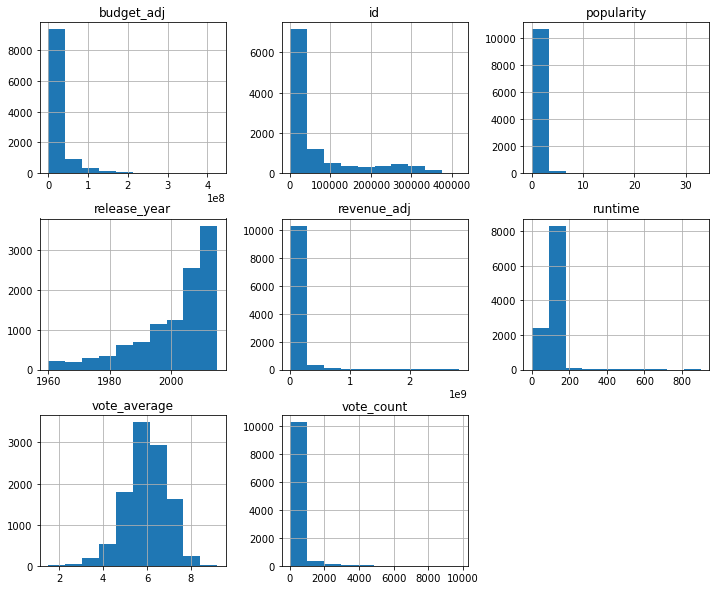

In [5]:
df_new.hist(figsize = (12, 10));

<a id='null_info'></a>
> ## Gettin rid null values: 
- We had 23 rows with null values in Genres, and because ```genre``` is going to be an important column for our analysis, I decided to get rid of those columns.
- Once the cleaning is done, we can see that we have a dataset with less null values.

In [6]:
df_new = df_new.dropna(axis=0, subset=['genres'])

In [7]:
df_new.isnull().sum()

id                         0
imdb_id                    8
popularity                 0
original_title             0
cast                      75
director                  42
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='split'></a>
> ## Split columns by genre: 

In [8]:
genres=df_new['genres'].str.split('|', expand = True)

In [9]:
movies_new = df_new.join(genres)
movies_new.head(2)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,0,1,2,3,4
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None


In [10]:
movies_new = movies_new.melt(id_vars = list(df_new.columns), value_vars=list(genres.columns))

In [11]:
movies_new.head(5)

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,variable,value
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,0,Action
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,0,Action
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,0,Adventure
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,0,Action
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,0,Action


In [12]:
movies_new['value'].count()

26960

In [13]:
movies_new.groupby('value')['id'].nunique()

value
Action             2384
Adventure          1471
Animation           699
Comedy             3793
Crime              1354
Documentary         520
Drama              4760
Family             1231
Fantasy             916
Foreign             188
History             334
Horror             1637
Music               408
Mystery             810
Romance            1712
Science Fiction    1229
TV Movie            167
Thriller           2907
War                 270
Western             165
Name: id, dtype: int64

AttributeError: 'int' object has no attribute 'lstrip'

<a id='save'></a>
> ## Save cleaned dataset as a new file: 

In [15]:
#movies_new.to_csv('clean_dataset.csv', index=False)